### Application energy prediction data
This jupyter notebook focusses on the energy consumption of the appliances used at home. It aims to predict future energy consumption by using historical data.


### Variable Description:
***

- date time year-month-day hour:minute:second 
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chièvres weather station), in Celsius
- Pressure (from Chièvres weather station), in mm Hg
- RH_out, Humidity outside (from Chièvres weather station), in %
- Windspeed (from Chièvres weather station), in m/s
- Visibility (from Chièvres weather station), in km
- Tdewpoint (from Chièvres weather station), °C
- rv1, Random variable 1, nondimensional
- rv2, Rnadom variable 2, nondimensional

Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from 
Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.

In [329]:
#load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from datetime import datetime as dt

In [330]:
#read csv
energy_data = pd.read_csv("F:\ADS\Assignment 2\energydata_complete.csv")

In [197]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [47]:
#Renaming variables for ease
#energy_data = energy_data.rename(columns={'T1': 'temp_kitchen', 'T2': 'temp_livingRoom'})
#energy_data = energy_data.rename(columns={'T3': 'T_laundry', 'T4': 'T_officeRoom', 'T5': 'T_bathroom', 'T6': 'T_outsideBuilding'})
#energy_data = energy_data.rename(columns={'T7': 'temp_ironRoom', 'T8': 'temp_teenRoom','T9': 'temp_parentRoom', 'T_out': 'temp_outside'})
#energy_data = energy_data.rename(columns={'RH_1': 'RH_kitchen', 'RH_2': 'RH_living','RH_3': 'RH_laundry', 'RH_4': 'RH_office','RH_5': 'RH_bathroom', 'RH_6': 'RH_outside'})
#energy_data = energy_data.rename(columns={'RH_7': 'RH_ironRoom', 'RH_8': 'RH_teenRoom', 'RH_9': 'RH_parentRoom'})

In [198]:
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

In [199]:
energy_data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [200]:
pandas_profiling.ProfileReport(energy_data)

Number of variables,29
Number of observations,19735
Total Missing (%),0.0%
Total size in memory,4.4 MiB
Average record size in memory,232.0 B
Numeric,25
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,3


In [139]:
all_columns = energy_data.columns.tolist()
all_columns

['date',
 'Appliances',
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'rv1',
 'rv2']

In [ ]:
#energy_data[0]['date'] = energy_data['ID'].apply(lambda x: datetime.strptime(x, '%Y%m%d%H'))

In [ ]:
#sns.boxplot(x="Appliances", y="date",data= energy_data, palette="PRGn")
#sns.despine(offset=10, trim=True)

### Energy consumption prediction

In order to predict the energy consumption, we need to understand the energy consumption per hour, per day and even per month. Hence,need to further understand these, we need to extract the year,month, weekday,hours, minutes and seconds from the data variable.

In [340]:
energy_data['date'] = pd.to_datetime(energy_data['date'])

In [333]:
type(energy_data['date'])

pandas.core.series.Series

In [341]:
energy_data['time'] = energy_data['date'].dt.strftime('%H:%M:%S')

In [342]:
energy_data['weekday'] = energy_data['date'].dt.strftime('%A')

In [343]:
energy_data['weekday_No'] = energy_data['date'].dt.strftime('%w')

In [344]:
energy_data['hours'] = energy_data['date'].dt.strftime('%H')

In [345]:
energy_data['minutes'] = energy_data['date'].dt.strftime('%M')

In [346]:
energy_data['seconds'] = energy_data['date'].dt.strftime('%S')

In [347]:
energy_data['month'] = energy_data['date'].dt.strftime('%m')

In [348]:
energy_data['year'] = energy_data['date'].dt.strftime('%Y')

In [349]:
energy_data['weekNo'] = energy_data['date'].dt.strftime('%U')

In [350]:
def get_sec(Series):
    h,m,s = energy_data['time'].str.split(':')
    #h, m, s = energy_data['time'].split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [351]:
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv2,time,weekday_No,weekday,hours,minutes,seconds,month,year,weekNo
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,13.275433,17:00:00,1,Monday,17,00,00,01,2016,02
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,18.606195,17:10:00,1,Monday,17,10,00,01,2016,02
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,28.642668,17:20:00,1,Monday,17,20,00,01,2016,02
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,45.410390,17:30:00,1,Monday,17,30,00,01,2016,02
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,10.084097,17:40:00,1,Monday,17,40,00,01,2016,02
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,44.919484,17:50:00,1,Monday,17,50,00,01,2016,02
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,47.233763,18:00:00,1,Monday,18,00,00,01,2016,02
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,33.039890,18:10:00,1,Monday,18,10,00,01,2016,02
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,31.455702,18:20:00,1,Monday,18,20,00,01,2016,02
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,3.089314,18:30:00,1,Monday,18,30,00,01,2016,02


In [284]:
def weekend_weekday(weekday):
    if energy_data['weekday'] == "Saturday" or energy_data['weekday'] == "Sunday" :
        value = Weekend
    else:
        value = Weekday
    return value

### DATA CORRELATION:

Correlation is mutual association between variables. In any business, it is useful to express one quantity in terms of the other. It ranges from -1 to +1. 

In [228]:
energy_data.corr(method='pearson', min_periods=1)

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292,0.040281,0.016965,...,0.010010,-0.051462,0.099155,-0.034885,-0.152282,0.087122,0.000230,0.015357,-0.011145,-0.011145
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161,-0.008859,0.114936,...,-0.157592,-0.008766,-0.074423,-0.010576,0.068543,0.060281,0.020038,-0.036331,0.000521,0.000521
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550,0.877001,0.097861,...,0.844777,0.071756,0.682854,-0.150574,-0.345481,-0.087654,-0.076210,0.571333,-0.006203,-0.006203
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677,0.106180,0.880359,...,0.115263,0.764001,0.340788,-0.293957,0.274126,0.204932,-0.021057,0.639125,-0.000699,-0.000699
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497,0.762066,0.231563,...,0.675535,0.157346,0.792247,-0.133028,-0.505291,0.052495,-0.069721,0.582632,-0.011087,-0.011087
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326,-0.047304,0.721435,...,0.054544,0.676467,0.033703,-0.255646,0.584911,0.069190,-0.005368,0.499154,0.006275,0.006275
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234,0.852778,0.122737,...,0.901324,0.134602,0.699420,-0.189974,-0.281718,-0.100776,-0.102310,0.645909,-0.005194,-0.005194
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000,-0.140457,0.898978,...,-0.195270,0.833538,0.118237,-0.233274,0.356192,0.263188,0.017041,0.414398,-0.000477,-0.000477
T4,0.040281,-0.008859,0.877001,0.106180,0.762066,-0.047304,0.852778,-0.140457,1.000000,-0.048650,...,0.889439,-0.025549,0.663479,-0.075292,-0.388602,-0.185747,-0.104768,0.519504,-0.001815,-0.001815
RH_4,0.016965,0.114936,0.097861,0.880359,0.231563,0.721435,0.122737,0.898978,-0.048650,1.000000,...,-0.044518,0.856591,0.293307,-0.250748,0.336813,0.300192,0.002636,0.616508,-0.001787,-0.001787


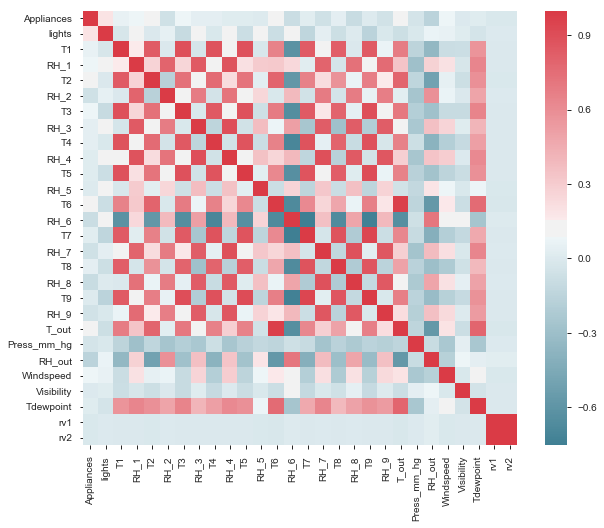

In [260]:
f, ax = plt.subplots(figsize=(10, 8))
corr = energy_data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.savefig("correlation.png")

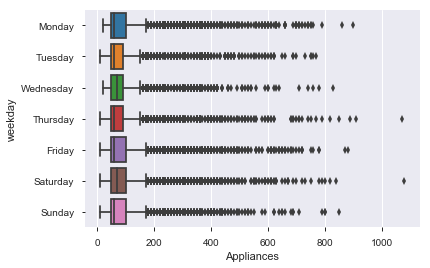

In [259]:
%matplotlib inline
boxplot = sns.boxplot(x="Appliances", y="weekday", data= energy_data)
plt.savefig("appliance_weekday.png")
plt.show()

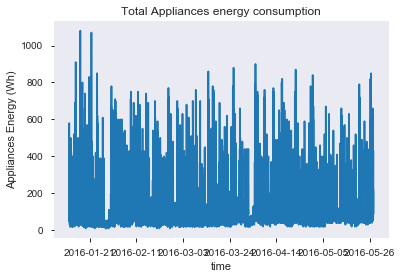

In [222]:
%matplotlib inline
fig, ax = plt.subplots()
ax.plot(energy_data['date'],energy_data['Appliances'])
ax.set(xlabel='time', ylabel='Appliances Energy (Wh)',
       title='Total Appliances energy consumption')
ax.grid()
fig.savefig("appliance_graph.png")
plt.show()

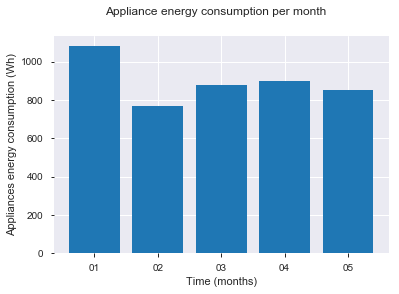

In [213]:
plt.bar(energy_data['month'], energy_data['Appliances'])
plt.xlabel("Time (months)")
plt.ylabel("Appliances energy consumption (Wh)")
plt.suptitle('Appliance energy consumption per month')
plt.show()

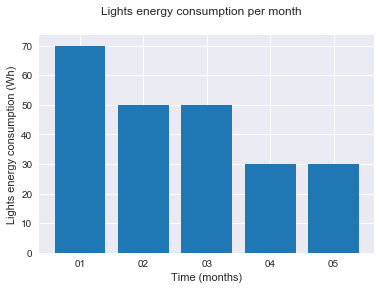

In [311]:
plt.bar(energy_data['month'], energy_data['lights'])
plt.xlabel("Time (months)")
plt.ylabel("Lights energy consumption (Wh)")
plt.suptitle('Lights energy consumption per month')
plt.show()

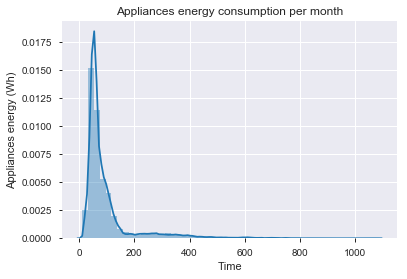

In [123]:
%matplotlib inline
x= energy_data['Appliances']
histogram = sns.distplot(x)
plt.xlabel('Time')
plt.ylabel('Appliances energy (Wh)')
plt.title('Appliances energy consumption per month')
plt.show()

In [240]:
#Subsetting the dataset
survey_dataset =energy_data.loc[:, 'Appliances':'RH_3']

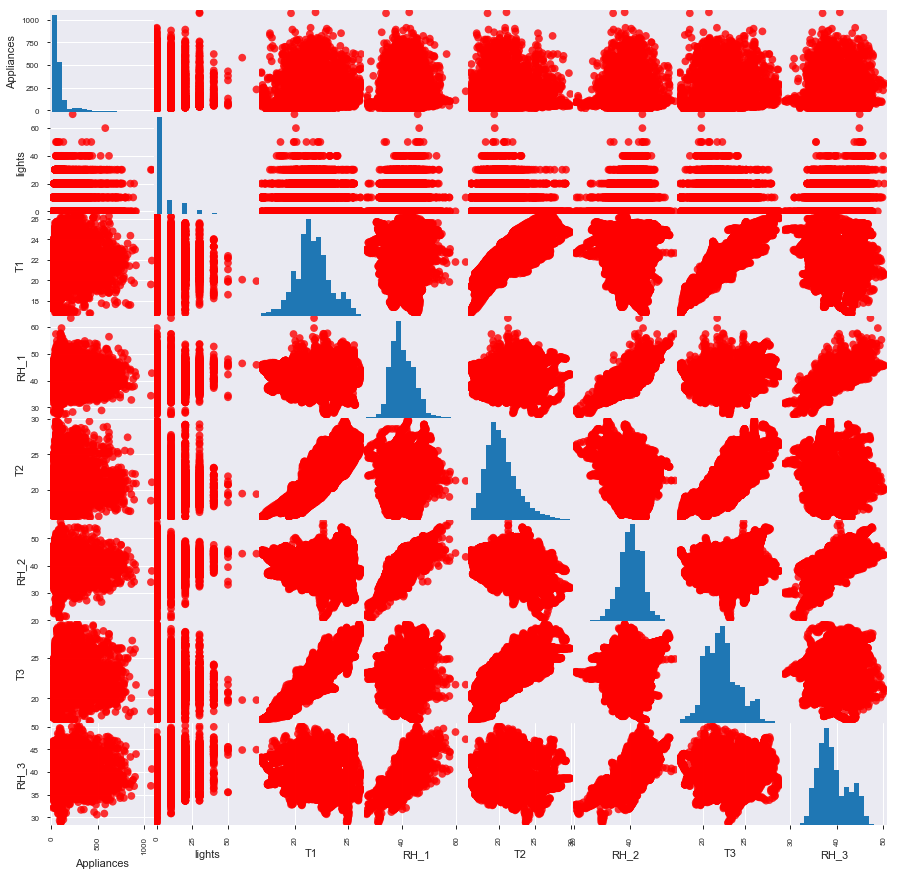

In [255]:
%matplotlib inline
scatter_matrix = pd.plotting.scatter_matrix(survey_dataset,figsize=(15, 15), marker='o',color = 'red',
                                            hist_kwds={'bins': 20}, s=60, alpha=.8)
fig.savefig('scatter_matrix.png')

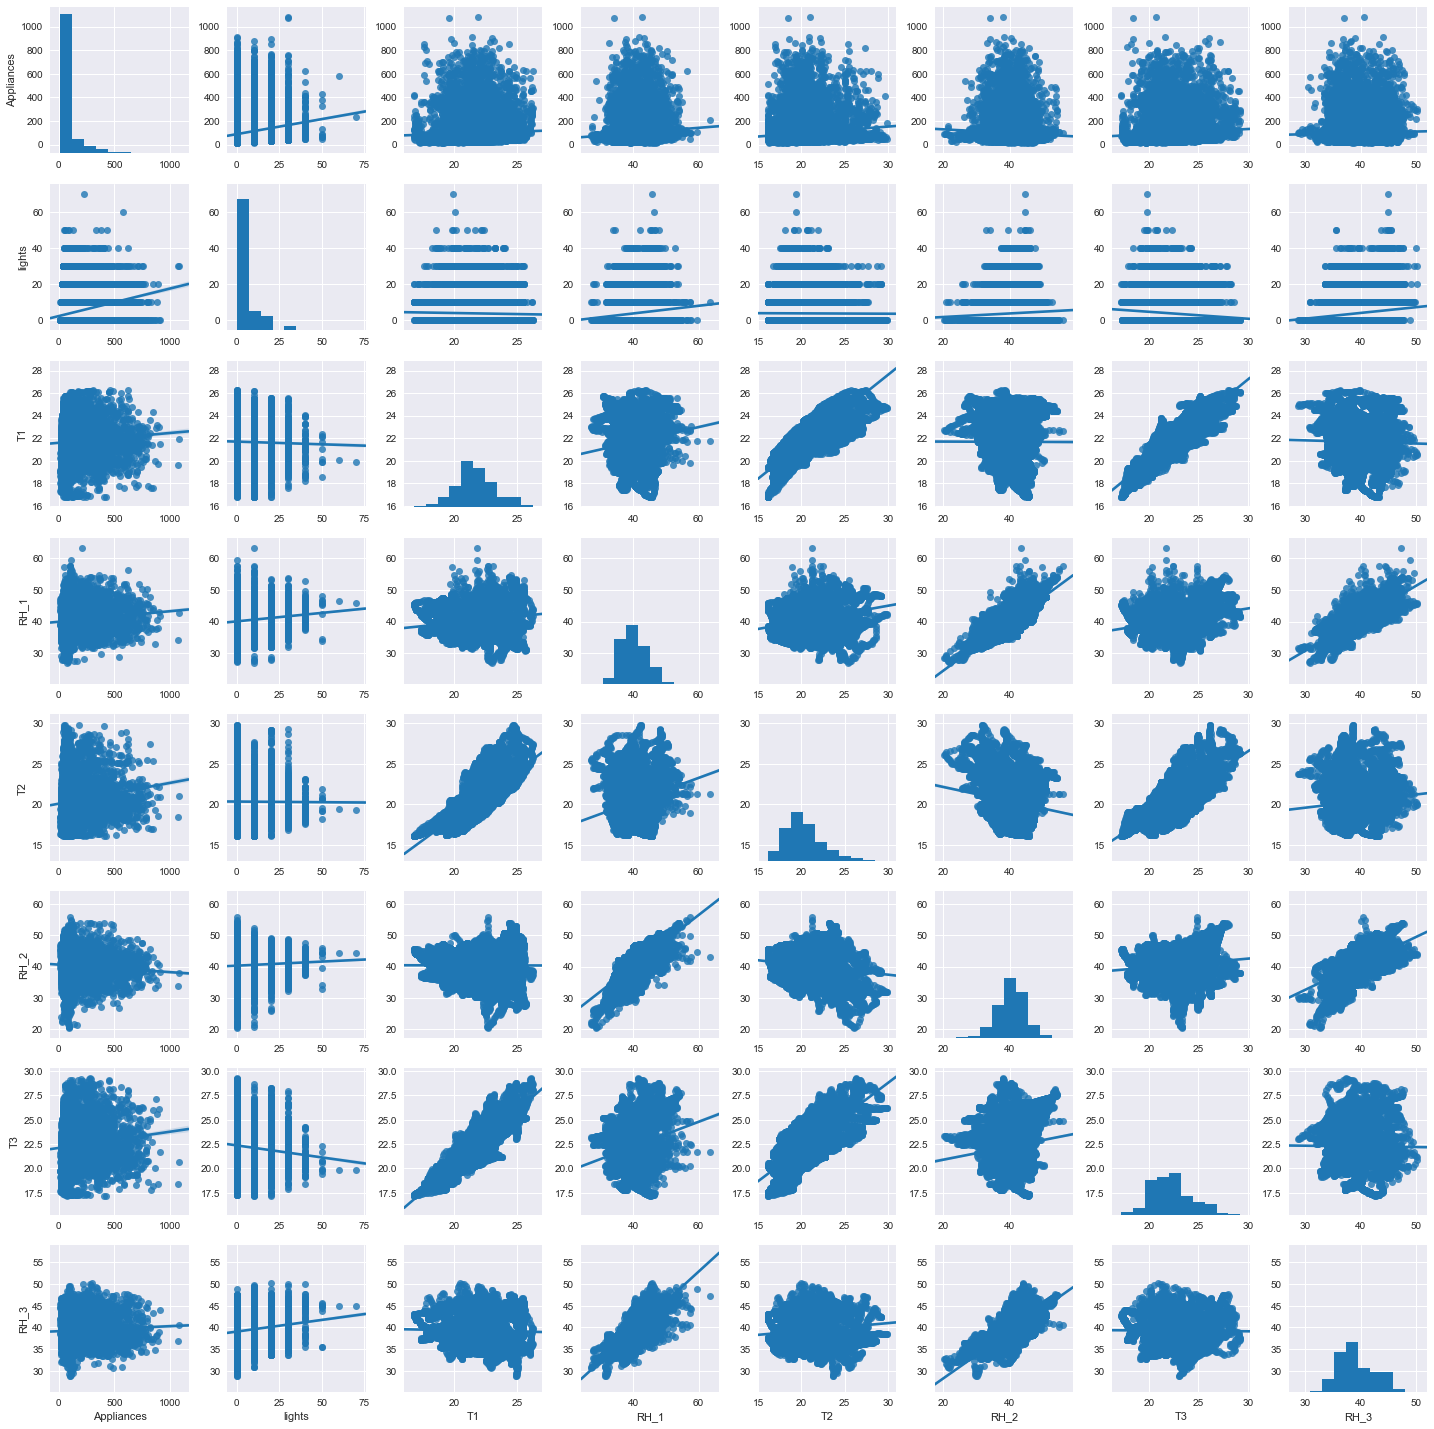

In [306]:
sns.pairplot(survey_dataset, kind = "reg")

In [321]:
survey_dataset.corr()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3
Appliances,1.000000,0.197278,0.055447,0.086031,0.120073,-0.060465,0.085060,0.036292
lights,0.197278,1.000000,-0.023528,0.106968,-0.005622,0.050985,-0.097393,0.131161
T1,0.055447,-0.023528,1.000000,0.164006,0.836834,-0.002509,0.892402,-0.028550
RH_1,0.086031,0.106968,0.164006,1.000000,0.269839,0.797535,0.253230,0.844677
T2,0.120073,-0.005622,0.836834,0.269839,1.000000,-0.165610,0.735245,0.121497
RH_2,-0.060465,0.050985,-0.002509,0.797535,-0.165610,1.000000,0.137319,0.678326
T3,0.085060,-0.097393,0.892402,0.253230,0.735245,0.137319,1.000000,-0.011234
RH_3,0.036292,0.131161,-0.028550,0.844677,0.121497,0.678326,-0.011234,1.000000
